In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error ,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression , Lasso, Ridge, OrthogonalMatchingPursuitCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
dataset = pd.read_csv("/kaggle/input/daily-demand-forecasting-orderscsv/Daily Demand Forecasting Orders.csv")
dataset.head()

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Unnamed: 0                                                          60 non-null     int64  
 1   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 2   Day of the week (Monday to Friday)                                  60 non-null     int64  
 3   Non-urgent order                                                    60 non-null     float64
 4   Urgent order                                                        60 non-null     float64
 5   Order type A                                                        60 non-null     float64
 6   Order type B                                                        60 non-null     float64
 7   Order type C       

In [5]:
dataset.shape

(60, 14)

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,60.0,29.500000,17.464249,0.000,14.75000,29.5000,44.25000,59.000
"Week of the month (first week, second, third, fourth or fifth week",60.0,3.016667,1.282102,1.000,2.00000,3.0000,4.00000,5.000
Day of the week (Monday to Friday),60.0,4.033333,1.401775,2.000,3.00000,4.0000,5.00000,6.000
Non-urgent order,60.0,172.554933,69.505788,43.651,125.34800,151.0625,194.60650,435.304
Urgent order,60.0,118.920850,27.170929,77.371,100.88800,113.1145,132.10825,223.270
Order type A,60.0,52.112217,18.829911,21.826,39.45625,47.1665,58.46375,118.178
Order type B,60.0,109.229850,50.741388,25.125,74.91625,99.4820,132.17100,267.342
Order type C,60.0,139.531250,41.442932,74.372,113.63225,127.9900,160.10750,302.448
Fiscal sector orders,60.0,77.396133,186.502470,0.000,1.24325,7.8315,20.36075,865.000
Orders from the traffic controller sector,60.0,44504.350000,12197.905134,11992.000,34994.25000,44312.0000,52111.75000,71772.000


In [7]:
dataset.skew()

Unnamed: 0                                                            0.000000
Week of the month (first week, second, third, fourth or fifth week    0.017892
Day of the week (Monday to Friday)                                   -0.022888
Non-urgent order                                                      1.546244
Urgent order                                                          1.300066
Order type A                                                          1.724497
Order type B                                                          1.339496
Order type C                                                          1.728385
Fiscal sector orders                                                  3.146895
Orders from the traffic controller sector                             0.039353
Banking orders (1)                                                    2.043421
Banking orders (2)                                                    0.948538
Banking orders (3)                                  

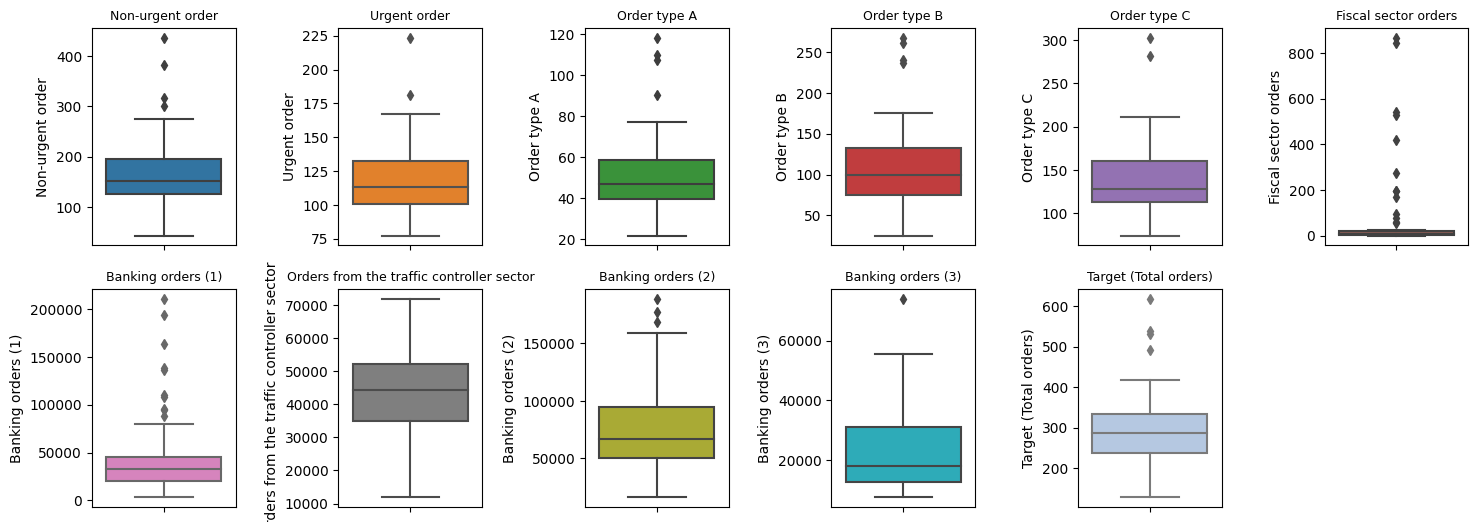

In [8]:
columnas = ['Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C',
           'Fiscal sector orders', 'Banking orders (1)', 'Orders from the traffic controller sector',
           'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']

f, axes = plt.subplots(3, 6, figsize=(15, 8))

axes = axes.flatten()

def create_boxplot_styled(columnas, ax, color):
    sns.boxplot(y=columnas, data=dataset, ax=ax, color=color)
    ax.set_title(columnas, fontsize=9)
    ax.set_xlabel("")

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", 
          "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8"]

for i, col in enumerate(columnas):
    create_boxplot_styled(col, axes[i], colors[i])

for i in range(len(columnas), len(axes)):
    f.delaxes(axes[i])

plt.tight_layout(pad=1.5)

plt.show()


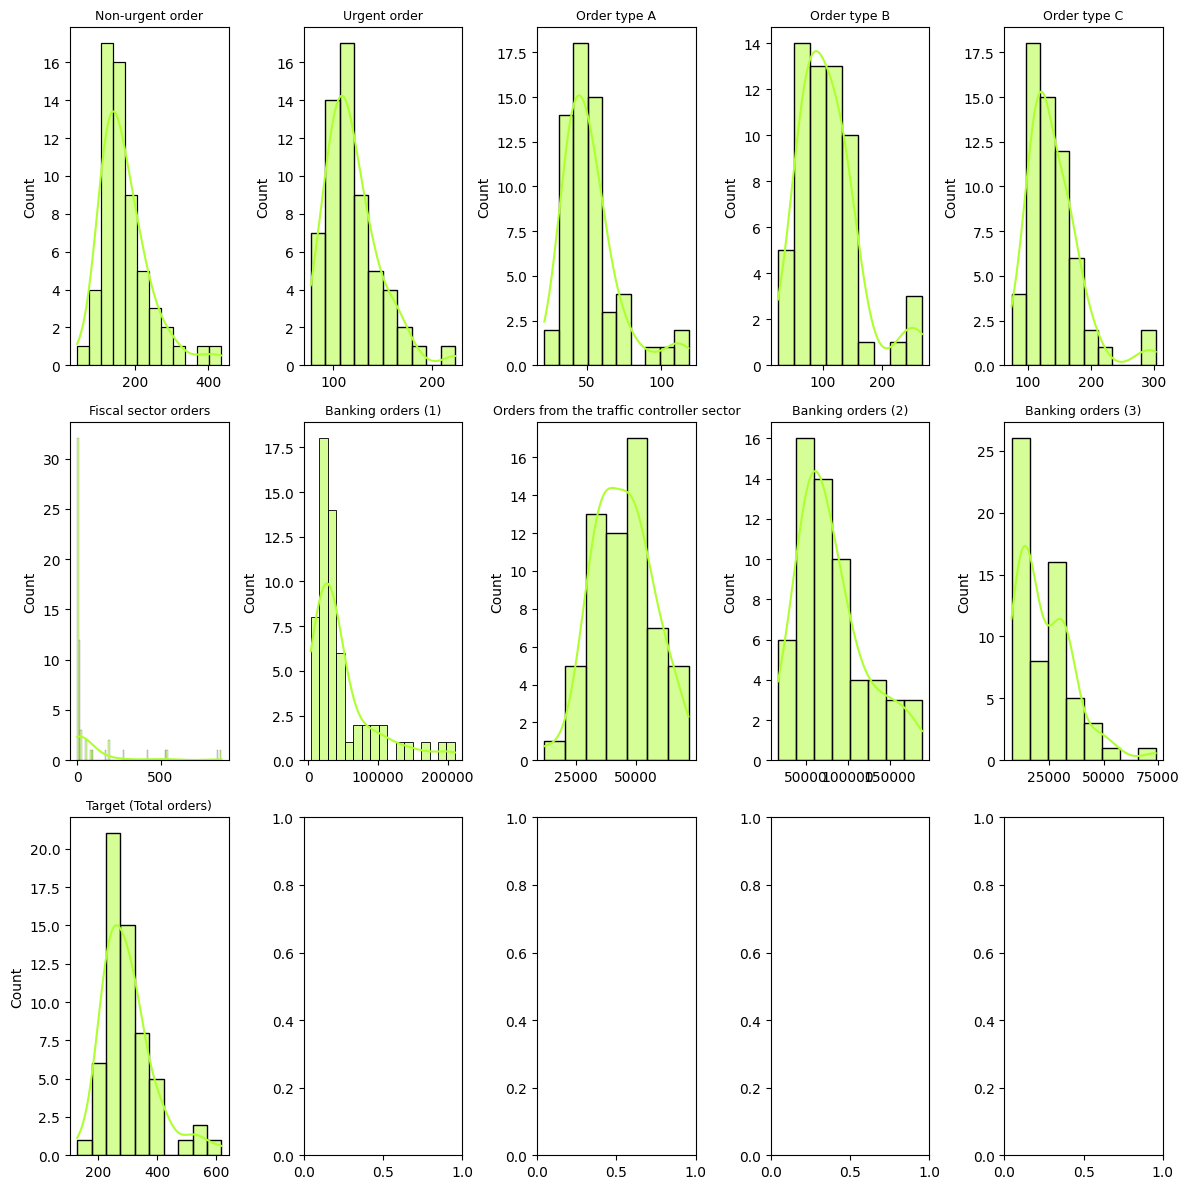

In [9]:
columnas = ['Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C',
           'Fiscal sector orders', 'Banking orders (1)', 'Orders from the traffic controller sector',
           'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']

fig, axes = plt.subplots(3, 5, figsize=(12, 12))

axes = axes.flatten()

def plot_histogram(col, ax):
    sns.histplot(data=dataset, x=col, kde=True, ax=ax, color='#ADFF2F')
    ax.set_title(col, fontsize=9)
    ax.set_xlabel("")

[plot_histogram(col, ax) for col, ax in zip(columnas, axes)]

plt.tight_layout()
plt.show()

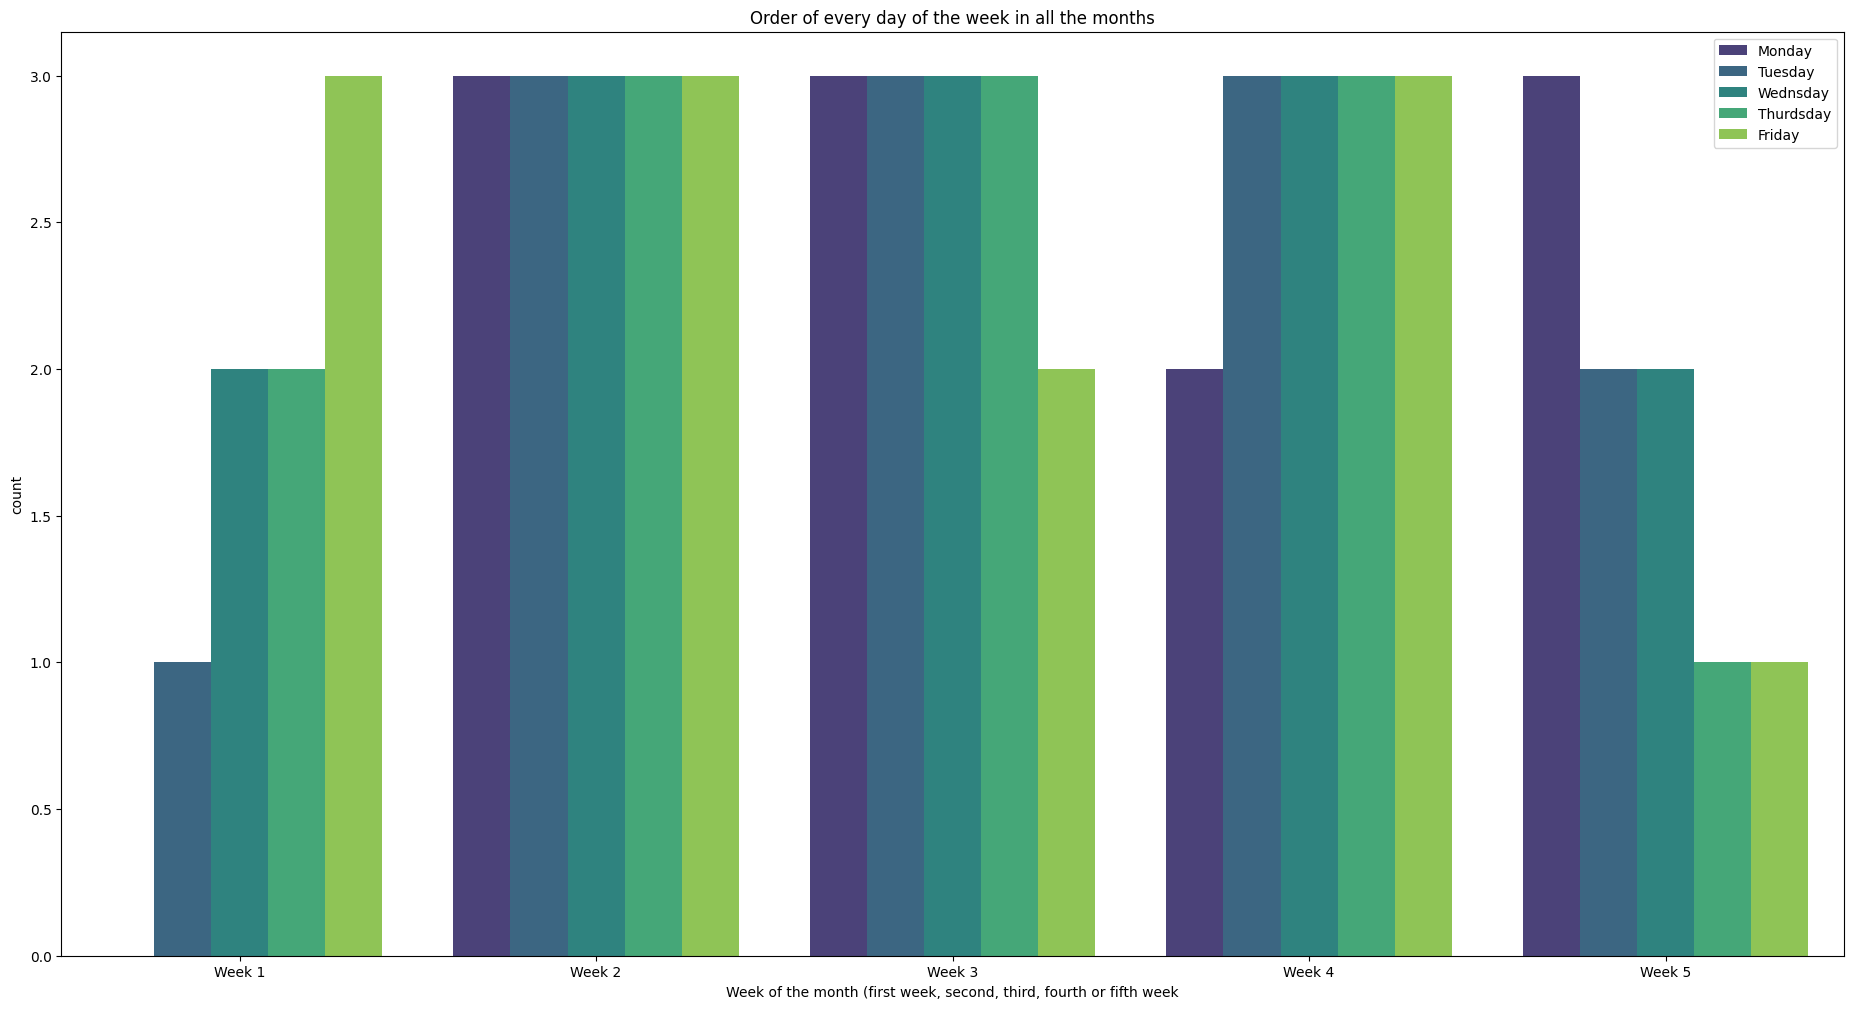

In [10]:
plt.figure(figsize=(23,12))
fig =sns.countplot(x='Week of the month (first week, second, third, fourth or fifth week', hue='Day of the week (Monday to Friday)', data=dataset,
                  palette='viridis')
fig.set(xticklabels=['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'])
plt.legend(['Monday', 'Tuesday', 'Wednsday', 'Thurdsday', 'Friday'])
plt.title('Order of every day of the week in all the months');

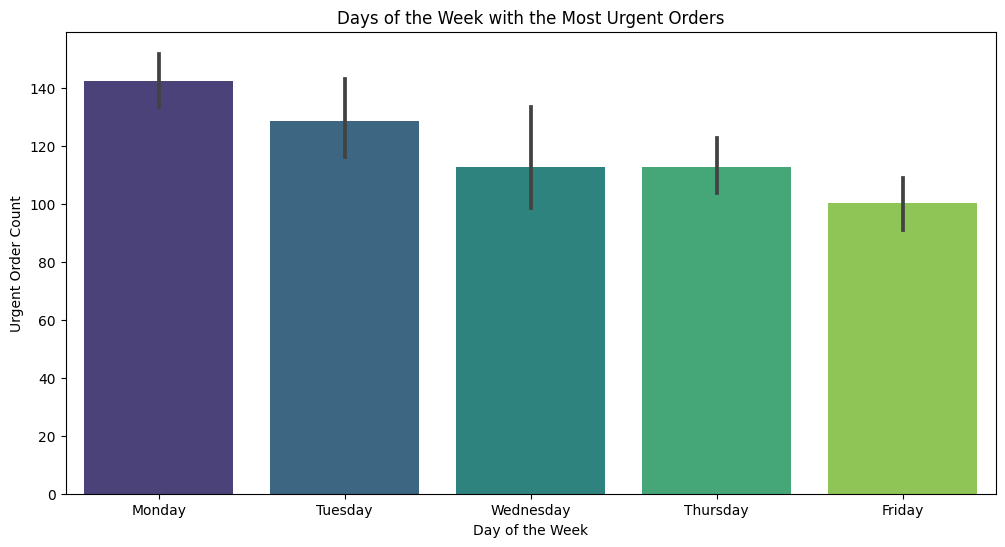

In [11]:
plt.figure(figsize=(12, 6))

fig = sns.barplot(x='Day of the week (Monday to Friday)', y='Urgent order', data=dataset, palette='viridis')

fig.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.xlabel('Day of the Week')
plt.ylabel('Urgent Order Count')

plt.title('Days of the Week with the Most Urgent Orders')

plt.show()

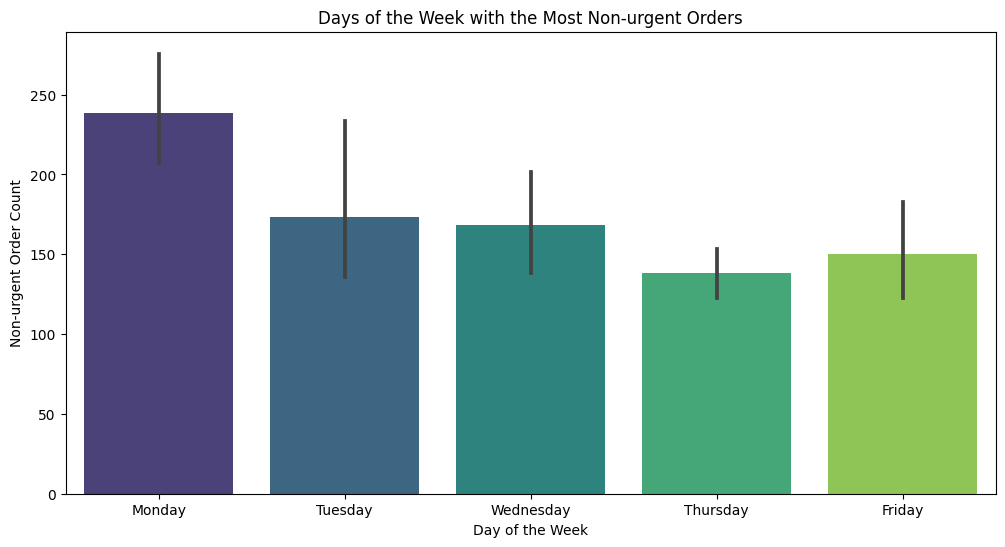

In [12]:
plt.figure(figsize=(12, 6))

fig = sns.barplot(x='Day of the week (Monday to Friday)', y='Non-urgent order', data=dataset, palette='viridis')

fig.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.xlabel('Day of the Week')
plt.ylabel('Non-urgent Order Count')

plt.title('Days of the Week with the Most Non-urgent Orders')

plt.show()

In [13]:
labels = ['Order type A', 'Order type B', 'Order type C']
data = [dataset['Order type A'].sum(), dataset['Order type B'].sum(), dataset['Order type C'].sum()]

df_data = pd.DataFrame({'labels': labels, 'data': data})


fig = px.pie(df_data, values='data', names='labels', labels={'labels': 'Order Type'})


fig.update_layout(title='Distribution of Order Based on Types')


fig.show()

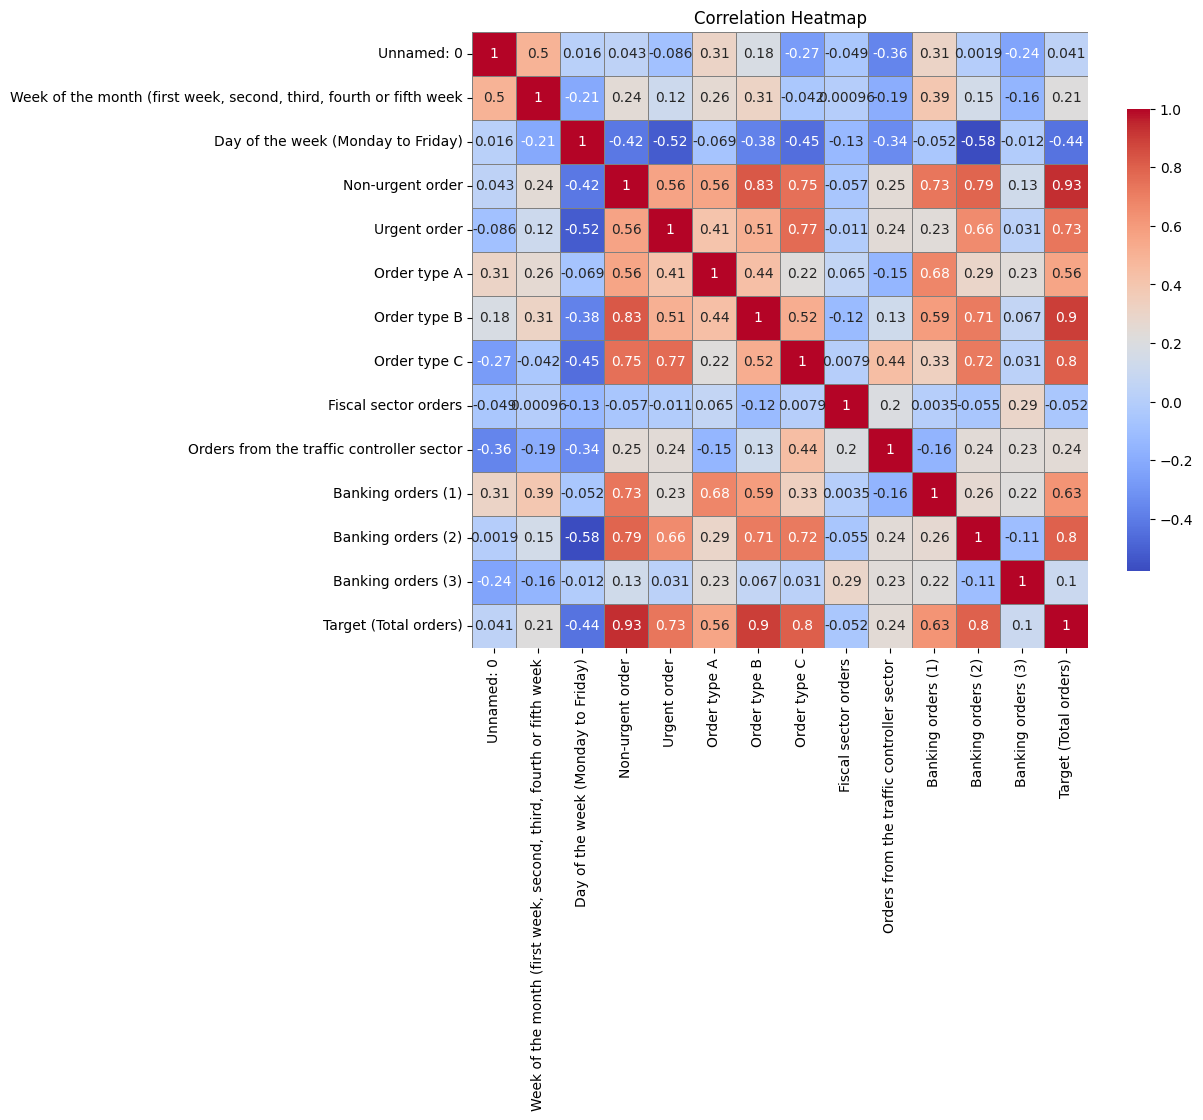

In [14]:
plt.figure(figsize=(10, 8))

corr = dataset.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', square=True, cbar_kws={'shrink': 0.75})

plt.title('Correlation Heatmap')

plt.show()

In [15]:
X_check = dataset.drop(columns=['Target (Total orders)'])
y_check = dataset['Target (Total orders)']

scaler1 = StandardScaler()
X_scaled_check = scaler1.fit_transform(X_check)

dt_model = DecisionTreeRegressor()

dt_model.fit(X_scaled_check, y_check)

DecisionTreeRegressor()

In [16]:
print("El r2_score del modelo is: ", r2_score(dt_model.predict(X_scaled_check), y_check))

El r2_score del modelo is:  1.0


In [17]:
print("El modelo score ess: ",dt_model.score(X_scaled_check, y_check))

El modelo score ess:  1.0


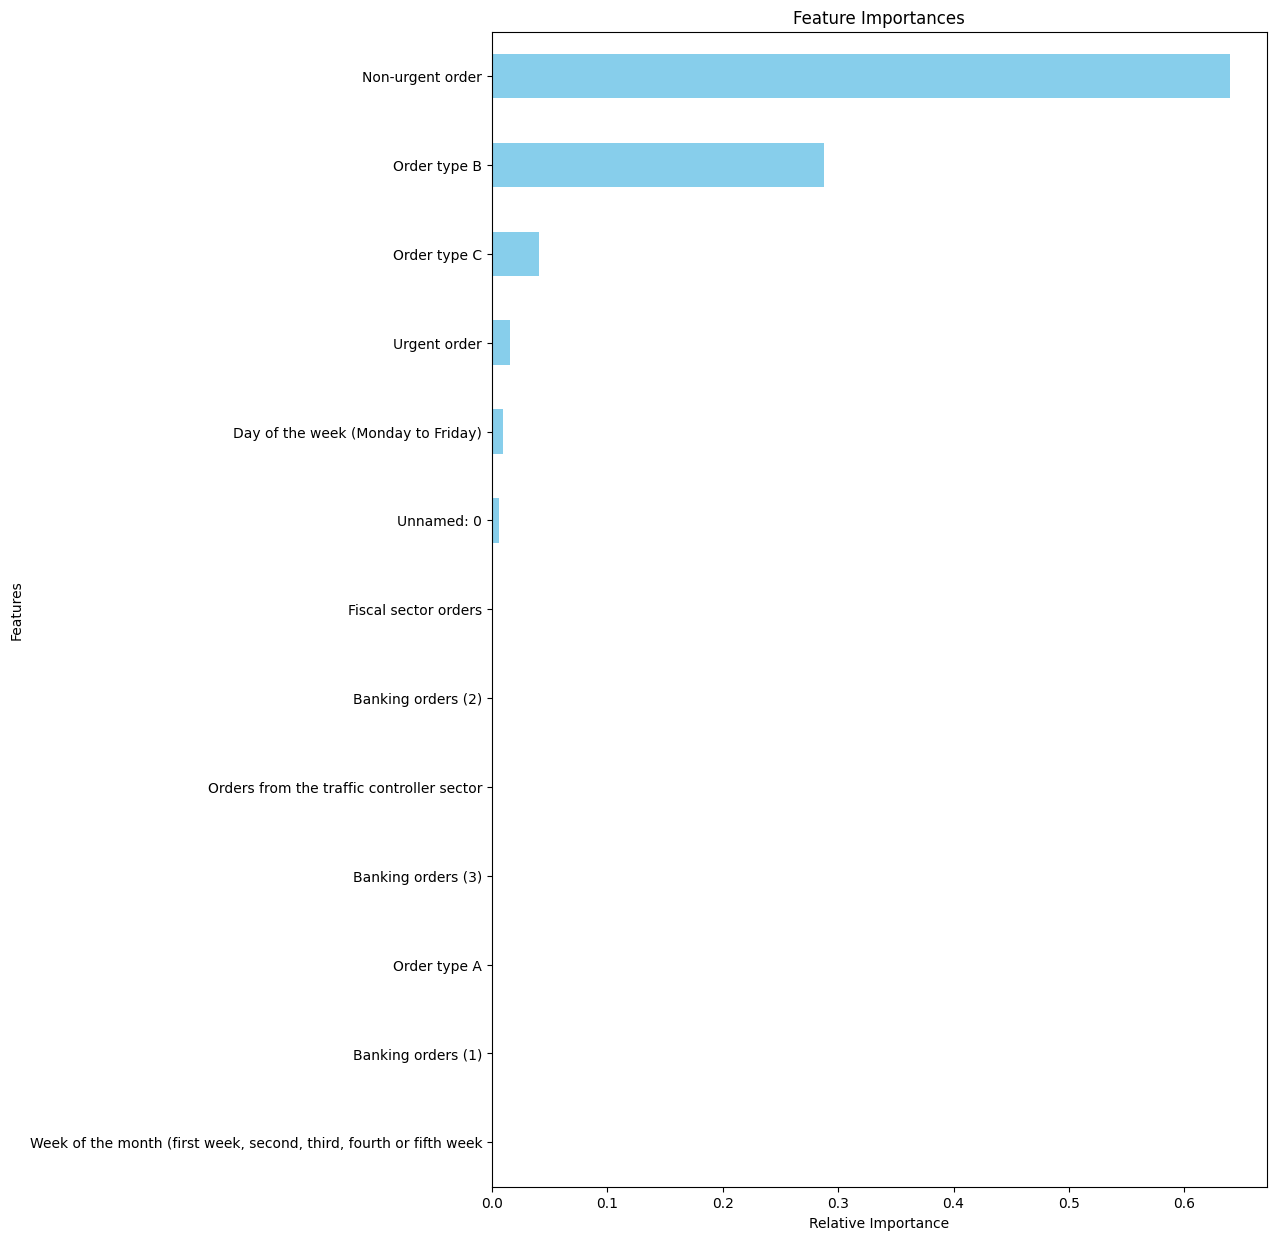

In [18]:
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
feat_importances = pd.Series(dt_model.feature_importances_, index=X_check.columns)
feat_importances.sort_values().plot(kind='barh',color='skyblue')

plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [19]:
df_new = dataset.drop(columns=['Unnamed: 0',
                          'Week of the month (first week, second, third, fourth or fifth week',
                          'Banking orders (2)',
                          'Banking orders (1)',
                          'Orders from the traffic controller sector',
                          'Fiscal sector orders',
                          'Order type A'])

In [20]:
df_new.columns

Index(['Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type B', 'Order type C', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [21]:
X = df_new.drop(columns=['Target (Total orders)'])
y = df_new['Target (Total orders)']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)                  

LinearRegression()

In [22]:
print("La puntuacion R^2  de Training set ess: ", r2_score(lr_model.predict(X_train_scaled), y_train))

La puntuacion R^2  de Training set ess:  0.990672719878012


In [23]:
print("La puntuacion r^2  de Test set es: ", r2_score(lr_model.predict(X_test_scaled), y_test))

La puntuacion r^2  de Test set es:  0.9268815767946439


In [24]:
print("El modelo score para Test set es: ",  lr_model.score(X_test_scaled, y_test))

El modelo score para Test set es:  0.9277808811369415


In [25]:
modelos = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'XGBoost Regressor': XGBRegressor(),
    'DecisionTree Regressor': DecisionTreeRegressor(),
    'Catboost': CatBoostRegressor(),
    'KNeighborRegressor': KNeighborsRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'OrthogonalMatchingPursuitCV': OrthogonalMatchingPursuitCV(),
    'RandomForestRegressor': RandomForestRegressor()

}
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_test_scores={}
  model_train_scores={}
  r2_train_scores={}
  r2_test_scores={}
  mse_train_scores={}
  mse_test_scores={}

  for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    model_test_scores[name]= model.score(X_test, y_test)
    model_train_scores[name]= model.score(X_train, y_train)

    r2_test_scores[name]= r2_score(y_pred, y_test)
    r2_train_scores[name]= r2_score(y_pred_train, y_train)

    mse_test_scores[name]= mean_squared_error(y_pred, y_test)
    mse_train_scores[name]= mean_squared_error(y_pred_train, y_train)

  return (model_test_scores,
         model_train_scores,
         r2_test_scores,
         r2_train_scores,
         mse_test_scores,
         mse_train_scores)
(test_score,
 train_score,
 r2_test,
 r2_train,
 mse_test,
 mse_train) = fit_and_score(modelos, X_train_scaled, X_test_scaled, y_train, y_test)

Learning rate set to 0.025341
0:	learn: 80.5344503	total: 54.6ms	remaining: 54.5s
1:	learn: 79.7353185	total: 55ms	remaining: 27.4s
2:	learn: 78.7945597	total: 55.3ms	remaining: 18.4s
3:	learn: 78.0394671	total: 55.6ms	remaining: 13.8s
4:	learn: 77.1241036	total: 56ms	remaining: 11.1s
5:	learn: 76.3118347	total: 56.4ms	remaining: 9.34s
6:	learn: 75.5286814	total: 56.7ms	remaining: 8.04s
7:	learn: 74.7532233	total: 57ms	remaining: 7.07s
8:	learn: 73.7365976	total: 57.4ms	remaining: 6.32s
9:	learn: 72.8002602	total: 57.7ms	remaining: 5.71s
10:	learn: 71.9520539	total: 58.1ms	remaining: 5.22s
11:	learn: 70.9964371	total: 58.3ms	remaining: 4.8s
12:	learn: 70.2393333	total: 58.6ms	remaining: 4.45s
13:	learn: 69.3697711	total: 58.9ms	remaining: 4.15s
14:	learn: 68.5996452	total: 59.3ms	remaining: 3.89s
15:	learn: 67.8921456	total: 59.7ms	remaining: 3.67s
16:	learn: 67.2066771	total: 60ms	remaining: 3.47s
17:	learn: 66.4641667	total: 60.4ms	remaining: 3.29s
18:	learn: 65.6053612	total: 60.6ms

In [26]:
score = pd.DataFrame({
    "Test Score": test_score,
    "Test r2": r2_test,
    "Test mse": mse_test,
    "Train Score": train_score,
    "Train r2": r2_train,
    "Train mse": mse_train,

}, index=train_score.keys())

score.sort_values(by='Test r2')

,Test Score,Test r2,Test mse,Train Score,Train r2,Train mse
DecisionTree Regressor,0.556324,-0.027603,4541.194591,1.000000,1.000000,0.000000e+00
RandomForestRegressor,0.681035,0.330656,3264.736426,0.980553,0.976263,1.287327e+02
Catboost,0.765268,0.542927,2402.576502,0.999968,0.999968,2.103728e-01
KNeighborRegressor,0.761277,0.573622,2443.422835,0.826748,0.632260,1.146869e+03
XGBoost Regressor,0.654837,0.710349,3532.875659,1.000000,1.000000,6.531043e-07
GradientBoosting,0.846752,0.791838,1568.557931,0.999986,0.999986,9.514906e-02
Lasso,0.910188,0.905533,919.262731,0.989674,0.989238,6.835310e+01
OrthogonalMatchingPursuitCV,0.927158,0.926127,745.563555,0.990706,0.990618,6.152543e+01
Linear Regression,0.927781,0.926882,739.191046,0.990759,0.990673,6.117279e+01
Ridge,0.948331,0.945754,528.852101,0.990234,0.989945,6.464664e+01


In [27]:
pca = PCA(n_components = 5)
X_train_scaled1 = X_train_scaled.copy()
#creating a dtaframe of the dataset
X_train_scaled1 = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled1.head()

,Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type B,Order type C,Banking orders (3)
0,0.695422,-0.024475,0.465497,0.224938,0.437359,1.025338
1,-1.462783,-0.018251,0.324610,0.080771,0.553647,-0.359843
2,-0.023980,-1.103546,-1.173819,-0.549595,-1.585533,-0.592470
3,1.414823,-0.974113,-0.379788,-0.750363,-0.622839,-0.422966
4,-1.462783,0.671769,0.202651,0.775967,0.547807,-0.970749


In [28]:
X_test_scaled1 = X_test_scaled.copy()
X_test_scaled1 = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled1.head()

,Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type B,Order type C,Banking orders (3)
0,-0.023980,2.085656,3.872880,1.318768,3.964285,-0.638259
1,-0.023980,-0.894171,-0.837338,-1.163148,-0.332471,0.141998
2,-1.462783,3.035411,0.783867,3.008980,0.306665,1.878075
3,-1.462783,0.221331,1.801327,0.414736,0.698916,-0.971899
4,-1.462783,0.693343,0.834528,0.231238,1.381268,0.465820


In [29]:
X_train_pca = pca.fit_transform(X_train_scaled1)
X_test_pca = pca.transform(X_test_scaled1)
(test_score1,
 train_score1,
 r2_test1,
 r2_train1,
 mse_test1,
 mse_train1) = fit_and_score(modelos, X_train_pca, X_test_pca, y_train, y_test)

Learning rate set to 0.025341
0:	learn: 80.6081663	total: 497us	remaining: 497ms
1:	learn: 80.1728271	total: 921us	remaining: 460ms
2:	learn: 79.5775387	total: 1.32ms	remaining: 438ms
3:	learn: 78.8416390	total: 1.65ms	remaining: 411ms
4:	learn: 78.1360119	total: 1.98ms	remaining: 394ms
5:	learn: 77.5448796	total: 2.28ms	remaining: 378ms
6:	learn: 76.6723401	total: 2.64ms	remaining: 375ms
7:	learn: 76.0715238	total: 3.01ms	remaining: 373ms
8:	learn: 75.2664464	total: 3.34ms	remaining: 368ms
9:	learn: 74.6460909	total: 3.65ms	remaining: 362ms
10:	learn: 73.9998408	total: 3.99ms	remaining: 358ms
11:	learn: 73.4028693	total: 4.36ms	remaining: 359ms
12:	learn: 72.8912771	total: 4.72ms	remaining: 359ms
13:	learn: 72.2668218	total: 5.1ms	remaining: 359ms
14:	learn: 71.6304211	total: 5.4ms	remaining: 355ms
15:	learn: 70.8722939	total: 5.57ms	remaining: 343ms
16:	learn: 70.2002173	total: 5.75ms	remaining: 333ms
17:	learn: 69.6628148	total: 6.07ms	remaining: 331ms
18:	learn: 68.9806584	total: 6

In [30]:
score_pca = pd.DataFrame({
    "Test Score": test_score1,
    "Test r2": r2_test1,
    "Test mse": mse_test1,
    "Train Score": train_score1,
    "Train r2": r2_train1,
    "Train mse": mse_train1,

}, index=train_score1.keys())

score_pca.sort_values(by='Test r2')

,Test Score,Test r2,Test mse,Train Score,Train r2,Train mse
Catboost,0.707000,0.155951,2998.968340,0.999989,0.999989,7.092091e-02
KNeighborRegressor,0.786566,0.602503,2184.576345,0.826985,0.633608,1.145300e+03
DecisionTree Regressor,0.629346,0.694607,3793.790799,1.000000,1.000000,0.000000e+00
RandomForestRegressor,0.857841,0.800352,1455.057683,0.964356,0.954412,2.359513e+02
XGBoost Regressor,0.919257,0.914228,826.432714,1.000000,1.000000,5.981038e-07
GradientBoosting,0.935316,0.926851,662.061642,0.999955,0.999955,2.946856e-01
Lasso,0.967548,0.964405,332.160607,0.987255,0.986782,8.436516e+01
Ridge,0.969999,0.968062,307.073957,0.988488,0.988139,7.620372e+01
Linear Regression,0.971611,0.970388,290.575555,0.988623,0.988492,7.531370e+01
OrthogonalMatchingPursuitCV,0.971611,0.970388,290.575555,0.988623,0.988492,7.531370e+01


In [31]:
om = OrthogonalMatchingPursuitCV()
om.fit(X_train_pca, y_train)

OrthogonalMatchingPursuitCV()

In [32]:
print("El r2_score de Training set is: ", r2_score(om.predict(X_train_pca), y_train))
print("El r2_score de Training set is: ", r2_score(om.predict(X_test_pca), y_test))
print("El modelo score para Test set es: ", (om.score(X_test_pca, y_test)))

El r2_score de Training set is:  0.9884917800730987
El r2_score de Training set is:  0.9703879616129775
El modelo score para Test set es:  0.9716107079004515


In [33]:
y_pred = om.predict(X_test_pca)
predicion = pd.DataFrame({
    "True Value": y_test,
    "Predicted Value": y_pred,
    "Residual": y_test-y_pred
})
predicion

,True Value,Predicted Value,Residual
0,539.577,562.406723,-22.829723
1,207.364,210.777329,-3.413329
2,530.944,513.434218,17.509782
3,357.394,359.896923,-2.502923
4,363.402,365.553325,-2.151325
5,213.509,221.371605,-7.862605
6,346.035,346.476797,-0.441797
7,402.607,353.789106,48.817894
8,308.178,318.354786,-10.176786
9,303.447,307.969254,-4.522254


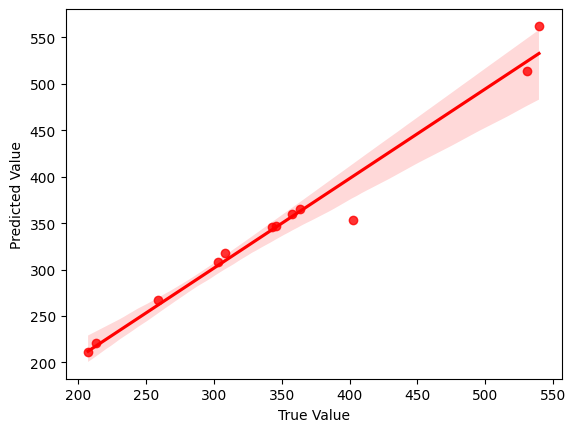

In [34]:
sns.regplot(x= 'True Value', y='Predicted Value', data=predicion,color="red");

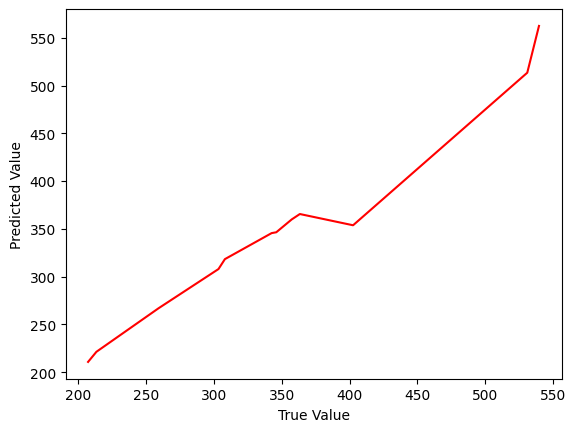

In [35]:
sns.lineplot(x= 'True Value', y='Predicted Value', data=predicion,color="red");

<Axes: xlabel='Predicted Value', ylabel='Residual'>

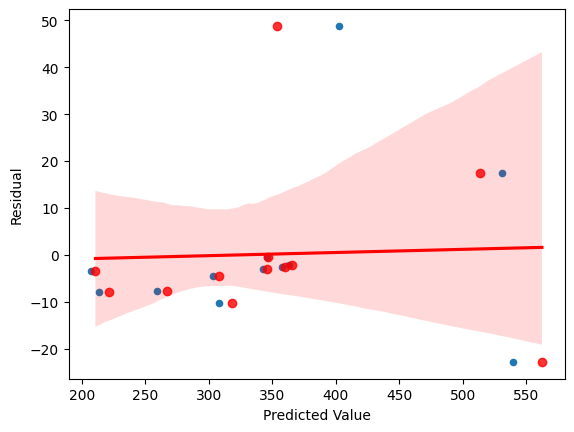

In [36]:
scatter = predicion.plot(kind='scatter', x="True Value", y='Residual')
sns.regplot( x='Predicted Value',y= 'Residual', data=predicion,color="red")

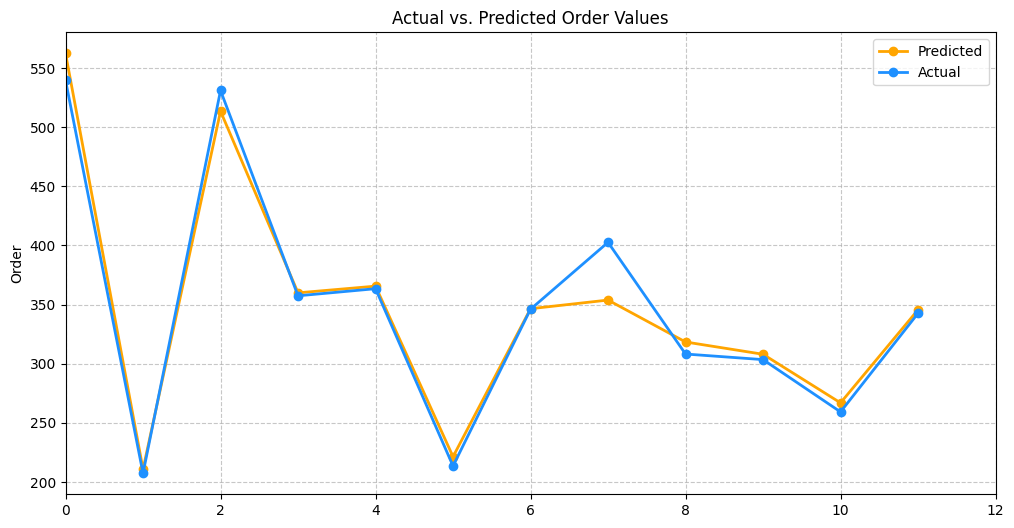

In [37]:
prediction_df = pd.DataFrame({
    "True Value": y_test,
    "Predicted Value": y_pred,
    "Residual": y_test - y_pred
})
plt.figure(figsize=(12, 6))
plt.plot(y_pred, label='Predicted', linewidth=2, color='orange', marker='o', markersize=6)
plt.plot(y_test, label='Actual', linewidth=2, color='dodgerblue', marker='o', markersize=6)
plt.xlim([0, len(y_pred)])
plt.ylabel('Order')
plt.legend()
plt.title('Actual vs. Predicted Order Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
